## Imporying Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[108.5   98.5   96.5 ]
   [113.5  103.5  101.5 ]
   [113.5  103.5  101.5 ]
   ...
   [111.5  100.5   96.5 ]
   [109.    98.    94.  ]
   [107.75  96.75  92.75]]

  [[113.   103.   101.  ]
   [110.5  100.5   98.5 ]
   [115.75 105.75 103.75]
   ...
   [109.    98.    94.  ]
   [107.    96.    92.  ]
   [107.75  96.75  92.75]]

  [[112.25 102.25 100.25]
   [114.25 104.25 102.25]
   [108.5   98.5   96.5 ]
   ...
   [112.5  101.5   97.5 ]
   [111.75 100.75  96.75]
   [109.25  98.25  94.25]]

  ...

  [[164.75 159.75 155.75]
   [166.25 161.25 157.25]
   [164.75 159.75 155.75]
   ...
   [163.   155.   152.  ]
   [165.5  157.5  154.5 ]
   [165.25 157.25 154.25]]

  [[163.5  158.5  154.5 ]
   [165.   160.   156.  ]
   [167.75 162.75 158.75]
   ...
   [165.75 157.75 154.75]
   [164.75 156.75 153.75]
   [161.5  153.5  150.5 ]]

  [[166.5  161.5  157.5 ]
   [163.25 158.25 154.25]
   [167.   162.   158.  ]
   ...
   [167.5  159.5  156.5 ]
   [167.5  159.5  156.5 ]
   [165.75 157.75 15

## Bulding Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
cnn = Sequential()

In [8]:
###Bulding Convolution Layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [18]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling Model

In [19]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
##Model Traing

In [22]:
training_history = cnn.fit(x=training_set,validation_data = validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1581s 718ms/step - accuracy: 0.3931 - loss: 2.1632 - val_accuracy: 0.8633 - val_loss: 0.4284
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1702s 775ms/step - accuracy: 0.8310 - loss: 0.5421 - val_accuracy: 0.9030 - val_loss: 0.2956
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1855s 844ms/step - accuracy: 0.9029 - loss: 0.3048 - val_accuracy: 0.9569 - val_loss: 0.1317
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2412s 1s/step - accuracy: 0.9320 - loss: 0.2091 - val_accuracy: 0.9657 - val_loss: 0.1047
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1762s 802ms/step - accuracy: 0.9503 - loss: 0.1532 - val_accuracy: 0.9783 - val_loss: 0.0670
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1467s 668ms/step - accuracy: 0.9624 - loss: 0.1144 - val_accuracy: 0.9658 - val_loss: 0.1039
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 13712s 6s/step - accuracy: 0.9697 - loss: 0.0913 - val_accuracy: 0.9808 - val_loss: 0.0591
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 20361s 9s/step - a

## Model Evaluation

In [23]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training loss:', train_loss)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 303s 138ms/step - accuracy: 0.9884 - loss: 0.0360
Training loss: 0.03354622796177864
Training accuracy: 0.9893022179603577


In [24]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 305s 139ms/step - accuracy: 0.9886 - loss: 0.0340
Validation loss: 0.03354623541235924
Validation accuracy: 0.9893022179603577


## Saving Model

In [39]:
cnn.save("trained_model.keras") ##use h5 and keras

In [26]:
training_history.history

{'accuracy': [0.592616856098175,
  0.8523508310317993,
  0.911373496055603,
  0.938245952129364,
  0.9532968401908875,
  0.9634966850280762,
  0.9709367752075195,
  0.9750622510910034,
  0.9795006513595581,
  0.9807810187339783],
 'loss': [1.389164924621582,
  0.4671291410923004,
  0.2755427658557892,
  0.1902630627155304,
  0.14496248960494995,
  0.11176545917987823,
  0.08816049993038177,
  0.07528696209192276,
  0.06300883740186691,
  0.05846269801259041],
 'val_accuracy': [0.8633331060409546,
  0.9030371904373169,
  0.9568959474563599,
  0.9657158851623535,
  0.9783056974411011,
  0.965843915939331,
  0.9808236956596375,
  0.9850202798843384,
  0.9915640950202942,
  0.9893022179603577],
 'val_loss': [0.42841753363609314,
  0.295561283826828,
  0.1317276656627655,
  0.10473045706748962,
  0.0670022964477539,
  0.10392002761363983,
  0.059089407324790955,
  0.0462908111512661,
  0.025895804166793823,
  0.03354623541235924]}

In [27]:
#Recording history in json
import json
with open("training_history.json", "w") as f:
    json.dump(training_history.history, f)

## Accuracy Visulization

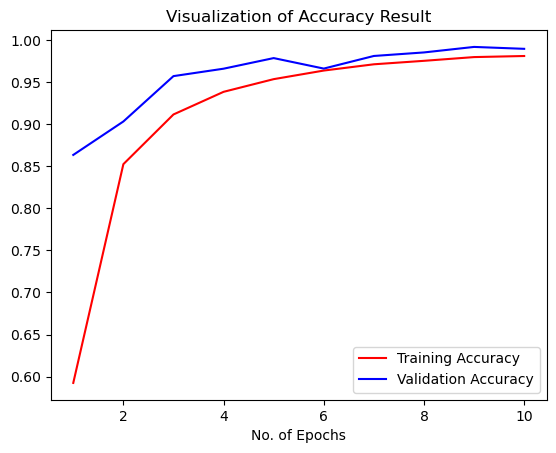

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [29]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [31]:
y_pred = cnn.predict(test_set)
y_pred, y_pred.shape

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 299s 136ms/step


(array([[9.8116815e-01, 4.8924608e-07, 7.5183357e-07, ..., 1.1721902e-07,
         1.1382980e-07, 4.2568263e-07],
        [9.9999869e-01, 1.0890307e-11, 7.4066149e-11, ..., 1.0198922e-13,
         2.2820821e-13, 2.9691059e-12],
        [9.9999070e-01, 1.4255285e-14, 2.9726774e-14, ..., 5.7260115e-17,
         1.4670720e-15, 1.4011883e-15],
        ...,
        [4.8236592e-14, 6.2383676e-13, 5.1970255e-12, ..., 1.5161681e-14,
         1.0972702e-11, 9.9999833e-01],
        [5.5159950e-11, 1.6886915e-10, 1.5257919e-10, ..., 1.8414735e-11,
         1.6451377e-08, 9.9914086e-01],
        [1.8351628e-14, 3.1169806e-14, 1.0263162e-13, ..., 2.2055021e-15,
         1.1768845e-12, 9.9999678e-01]], dtype=float32),
 (70295, 38))

In [32]:
predicted_categories = tf.argmax(y_pred, axis = 1)
predicted_categories

<tf.Tensor: shape=(70295,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(70295, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [34]:
Y_true = tf.argmax(true_categories, axis = 1)
Y_true

<tf.Tensor: shape=(70295,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
print(classification_report(Y_true, predicted_categories, target_names= class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.97      0.98      2016
                                 Apple___Black_rot       1.00      0.98      0.99      1987
                          Apple___Cedar_apple_rust       1.00      0.99      1.00      1760
                                   Apple___healthy       0.98      0.99      0.99      2008
                               Blueberry___healthy       1.00      0.99      0.99      1816
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00      1683
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99      1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.98      0.99      1642
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00      1907
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.98      0.

In [37]:
cm = confusion_matrix(Y_true,predicted_categories)
cm, cm.shape

(array([[1949,    4,    0, ...,    0,    1,    0],
        [   0, 1944,    0, ...,    0,    2,    0],
        [   0,    0, 1751, ...,    0,    3,    0],
        ...,
        [   0,    0,    0, ..., 1956,    0,    0],
        [   0,    0,    0, ...,    0, 1790,    0],
        [   0,    0,    0, ...,    0,    0, 1887]], dtype=int64),
 (38, 38))

### Confusion Matrix Visualization

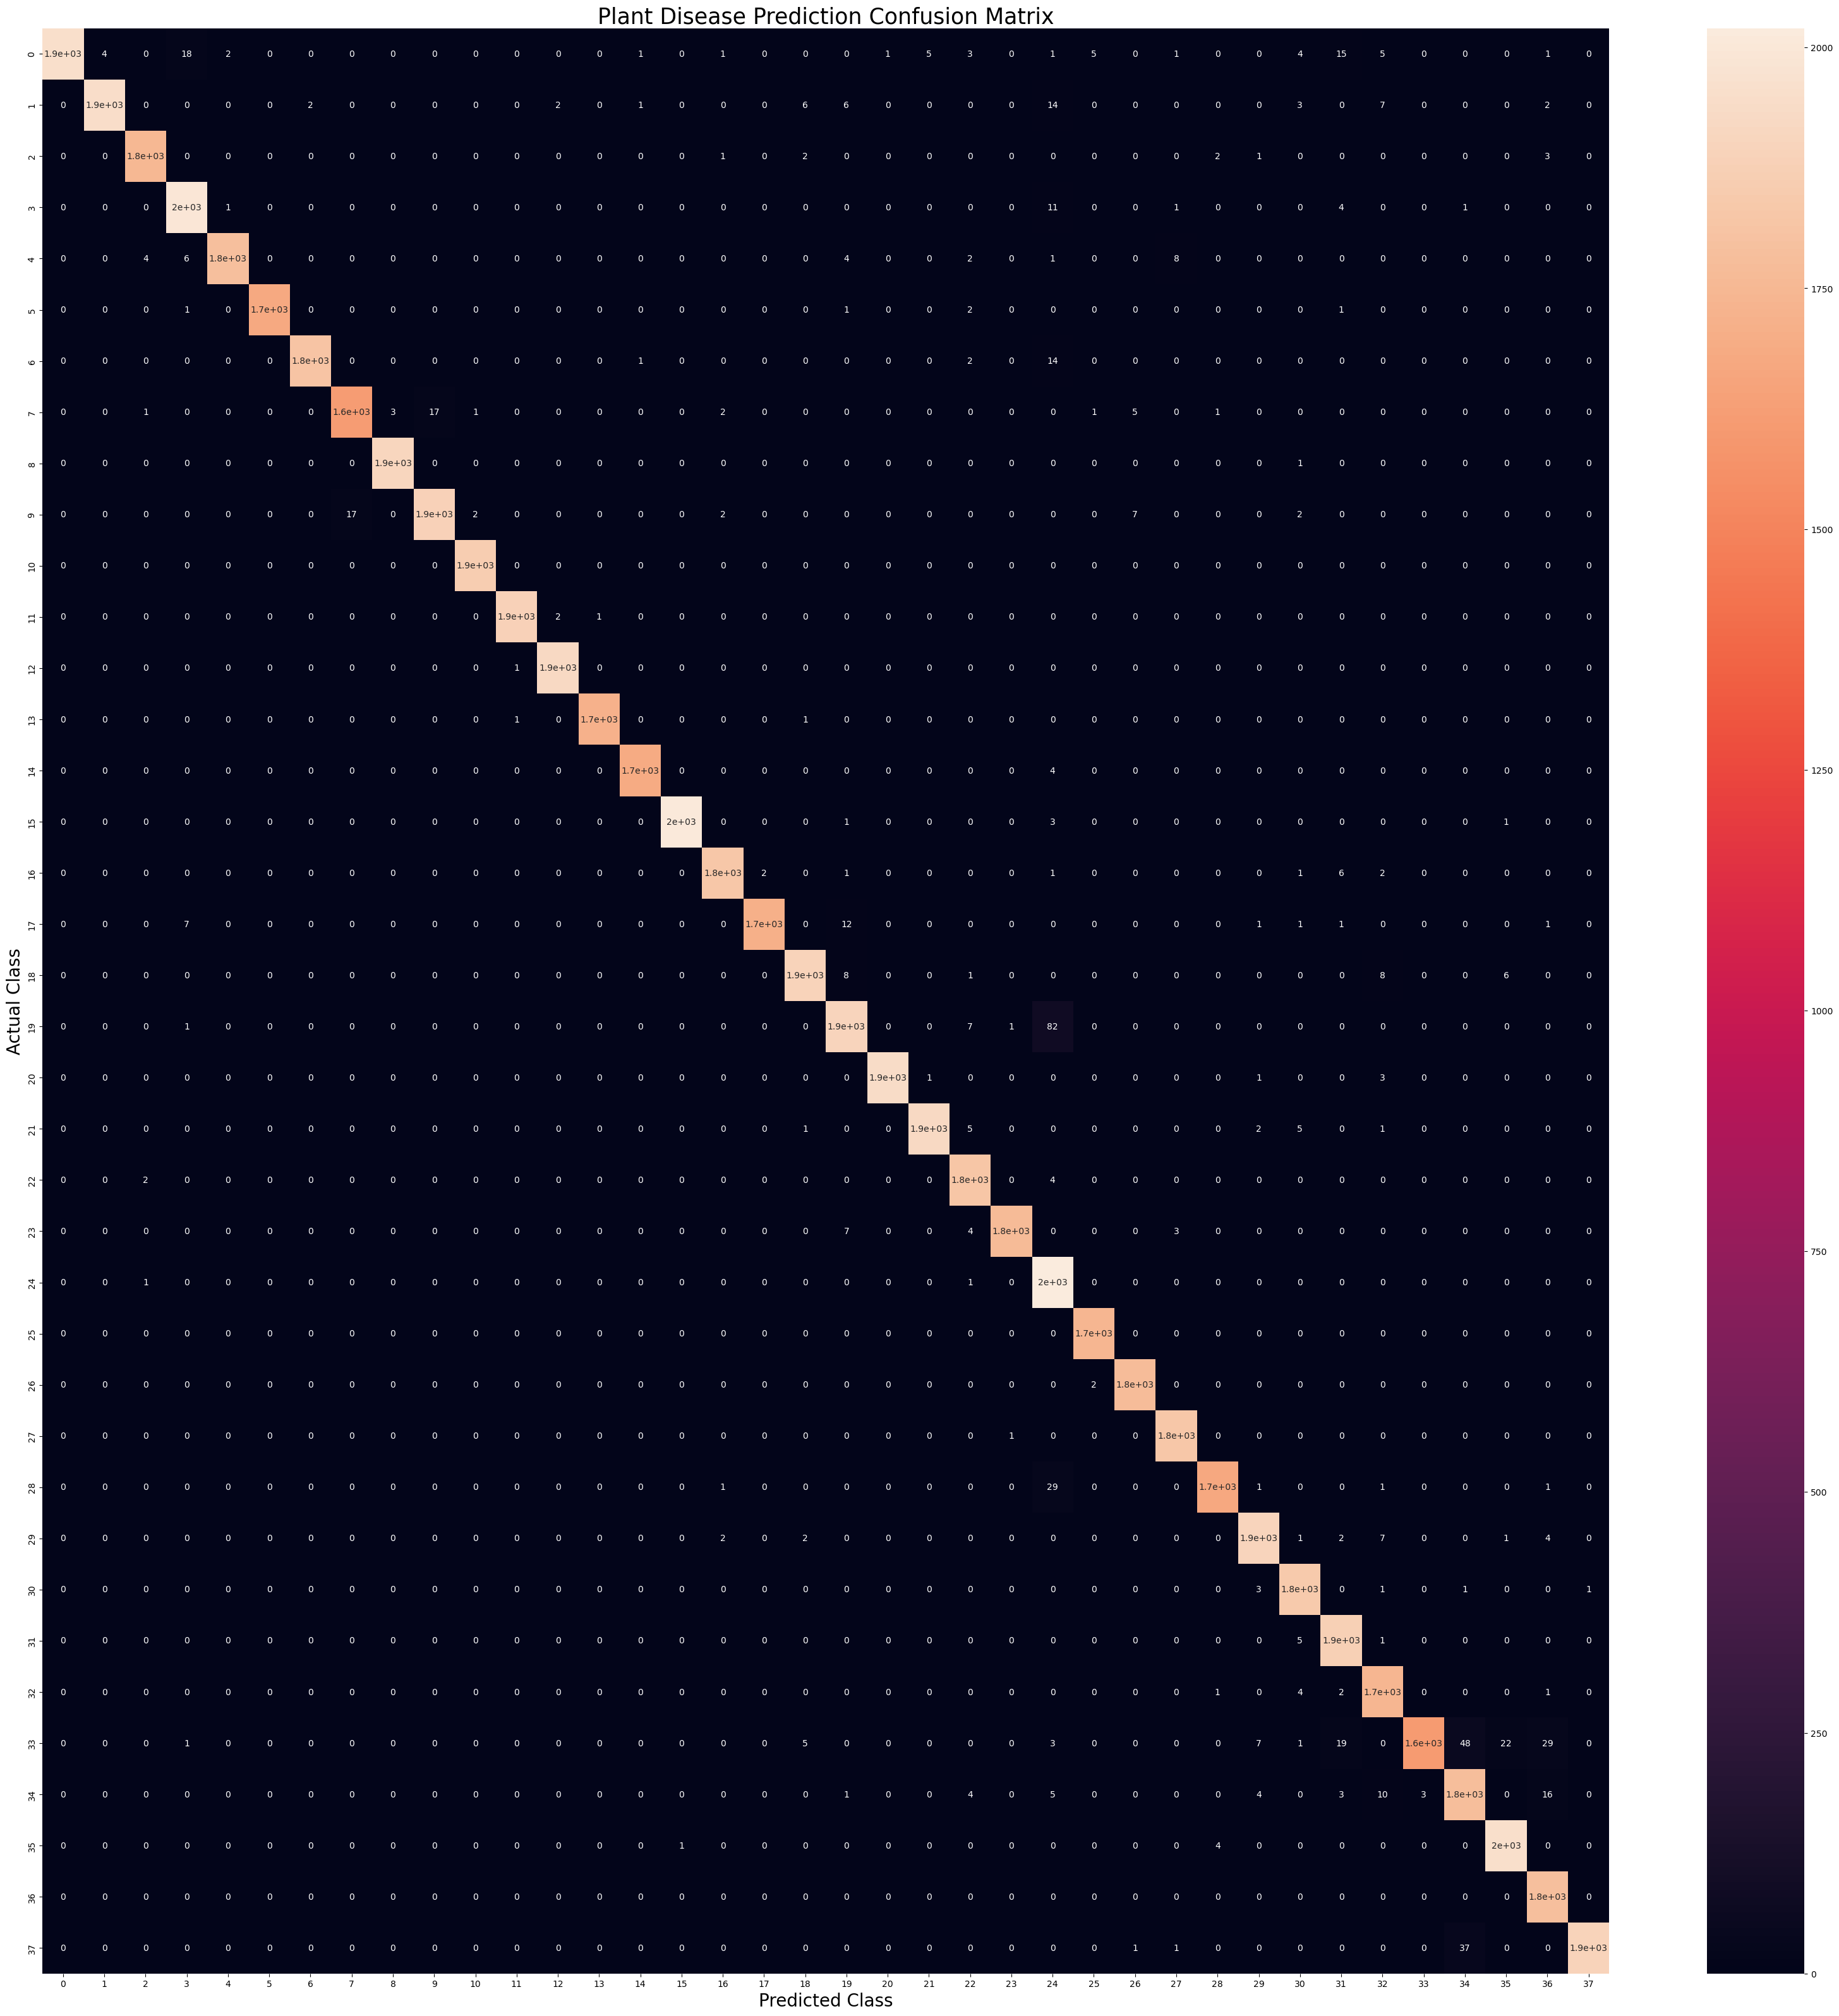

In [38]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

###### 